In [27]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

from datetime import datetime

In [5]:
df = pd.read_csv('crypto.csv', header=[0, 1], index_col=0, parse_dates=[0])
df.head()

Price          close                                                   \
Ticker           ada          btc      doge         eth sol       xrp   
Date                                                                    
2020-01-01  0.033458  7200.174316  0.002033  130.802002 NaN  0.192667   
2020-01-02  0.032751  6985.470215  0.002009  127.410179 NaN  0.188043   
2020-01-03  0.034180  7344.884277  0.002145  134.171707 NaN  0.193521   
2020-01-04  0.034595  7410.656738  0.002241  135.069366 NaN  0.194355   
2020-01-05  0.034721  7411.317383  0.002419  136.276779 NaN  0.195537   

Price           High                                     ...      Open  \
Ticker           ada          btc      doge         eth  ...      doge   
Date                                                     ...             
2020-01-01  0.033813  7254.330566  0.002052  132.835358  ...  0.002028   
2020-01-02  0.033507  7212.155273  0.002110  130.820038  ...  0.002034   
2020-01-03  0.034427  7413.715332  0.002177  134.554016  ...  0.002008   
2020-01-04  0.034685  7427.385742  0.002490  136.052719  ...  0.002144   
2020-01-05  0.035356  7544.497070  0.002491  139.410202  ...  0.002240   

Price                                   volume                         \
Ticker             eth sol       xrp       ada          btc      doge   
Date                                                                    
2020-01-01  129.630661 NaN  0.192912  22948374  18565664997  51180941   
2020-01-02  130.820038 NaN  0.192708  20843934  20802083465  65071106   
2020-01-03  127.411263 NaN  0.187948  30162644  28111481032  62619988   
2020-01-04  134.168518 NaN  0.193521  29535781  18444271275  94227582   
2020-01-05  135.072098 NaN  0.194367  21479178  19725074095  52631740   

Price                                    
Ticker              eth sol         xrp  
Date                                     
2020-01-01   7935230330 NaN  1041134003  
2020-01-02   8032709256 NaN  1085351426  
2020-01-03  10476845358 NaN  1270017043  
2020-01-04   7430904515 NaN   999331594  
2020-01-05   7526675353 NaN  1168067557  

[5 rows x 30 columns]

In [11]:
btc = df['close']['btc'].dropna().to_frame().copy()
btc

,btc
Date,
2020-01-01,7200.174316
2020-01-02,6985.470215
2020-01-03,7344.884277
2020-01-04,7410.656738
2020-01-05,7411.317383
...,...
2025-03-27,87177.101562
2025-03-28,84353.148438
2025-03-29,82597.585938


In [17]:
btc.rename(columns={'btc': 'price'}, inplace=True)
btc.head()

,price
Date,
2020-01-01,7200.174316
2020-01-02,6985.470215
2020-01-03,7344.884277
2020-01-04,7410.656738
2020-01-05,7411.317383


In [18]:
btc.shift(periods=1)
btc.head()

,price
Date,
2020-01-01,7200.174316
2020-01-02,6985.470215
2020-01-03,7344.884277
2020-01-04,7410.656738
2020-01-05,7411.317383


In [21]:
# Price change
btc['price_change'] = btc['price'].diff()
btc.head()

,price,price_change
Date,,
2020-01-01,7200.174316,NaN
2020-01-02,6985.470215,-214.704102
2020-01-03,7344.884277,359.414062
2020-01-04,7410.656738,65.772461
2020-01-05,7411.317383,0.660645


In [23]:
# Simple return
btc['returns'] = btc['price'].pct_change()
btc.head()

,price,price_change,returns
Date,,,
2020-01-01,7200.174316,NaN,NaN
2020-01-02,6985.470215,-214.704102,-0.029819
2020-01-03,7344.884277,359.414062,0.051452
2020-01-04,7410.656738,65.772461,0.008955
2020-01-05,7411.317383,0.660645,0.000089


In [24]:
# Log return

btc['log_returns'] = np.log(btc['price'] / btc['price'].shift(1))
btc.head()

,price,price_change,returns,log_returns
Date,,,,
2020-01-01,7200.174316,NaN,NaN,NaN
2020-01-02,6985.470215,-214.704102,-0.029819,-0.030273
2020-01-03,7344.884277,359.414062,0.051452,0.050172
2020-01-04,7410.656738,65.772461,0.008955,0.008915
2020-01-05,7411.317383,0.660645,0.000089,0.000089


In [31]:
btc.tail()

,price,price_change,returns,log_returns
Date,,,,
2025-03-27,87177.101562,276.218750,0.003179,0.003174
2025-03-28,84353.148438,-2823.953125,-0.032393,-0.032930
2025-03-29,82597.585938,-1755.562500,-0.020812,-0.021032
2025-03-30,82334.523438,-263.062500,-0.003185,-0.003190
2025-03-31,82548.914062,214.390625,0.002604,0.002601


In [30]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1917 entries, 2020-01-01 to 2025-03-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         1917 non-null   float64
 1   price_change  1916 non-null   float64
 2   returns       1916 non-null   float64
 3   log_returns   1916 non-null   float64
dtypes: float64(4)
memory usage: 74.9 KB


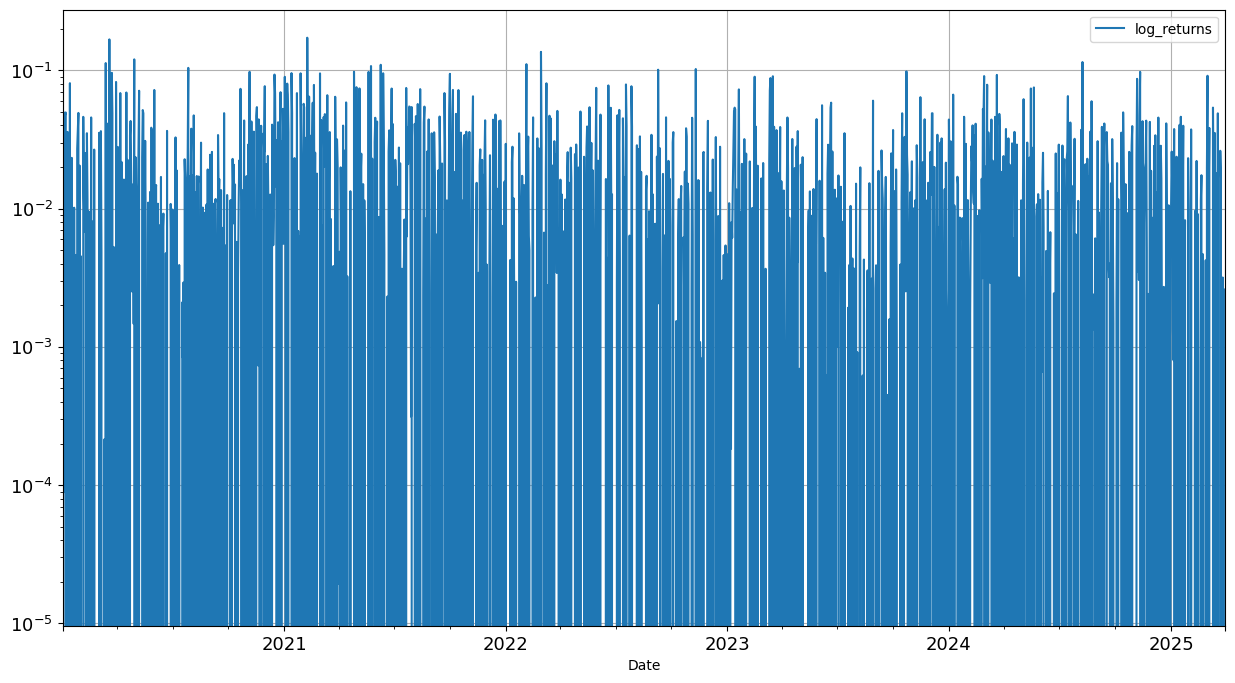

In [29]:
btc['log_returns'].dropna().plot(figsize=(15, 8), fontsize=13, logy=True)
plt.grid(True)
plt.legend()
plt.show()

plt.close()
